In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models, Input

In [2]:
df = pd.read_csv("diseases_ICD_indonesia.csv")

In [3]:
df # data yang masih terurut

,diseases,code,Kecemasan dan kegelisahan,Depresi,Sesak napas,Gejala depresi atau psikotis,Nyeri dada tajam,Pusing,Insomnia,Gerakan involunter abnormal,...,Gagap atau terbata-bata,Masalah dengan orgasme,Kelainan bentuk atau struktur hidung,Benjolan di rahang,Luka pada hidung,Kelemahan pinggul,Pembengkakan punggung,Kekakuan atau ketegangan pada pergelangan kaki,Kelemahan pergelangan kaki,Kelemahan leher
0,Panic Disorder,F41.0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Panic Disorder,F41.0,0,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Panic Disorder,F41.0,1,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Panic Disorder,F41.0,1,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Panic Disorder,F41.0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246028,Open Wound Of The Nose,S01.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246029,Open Wound Of The Nose,S01.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246030,Open Wound Of The Nose,S01.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246031,Open Wound Of The Nose,S01.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='diseases'>

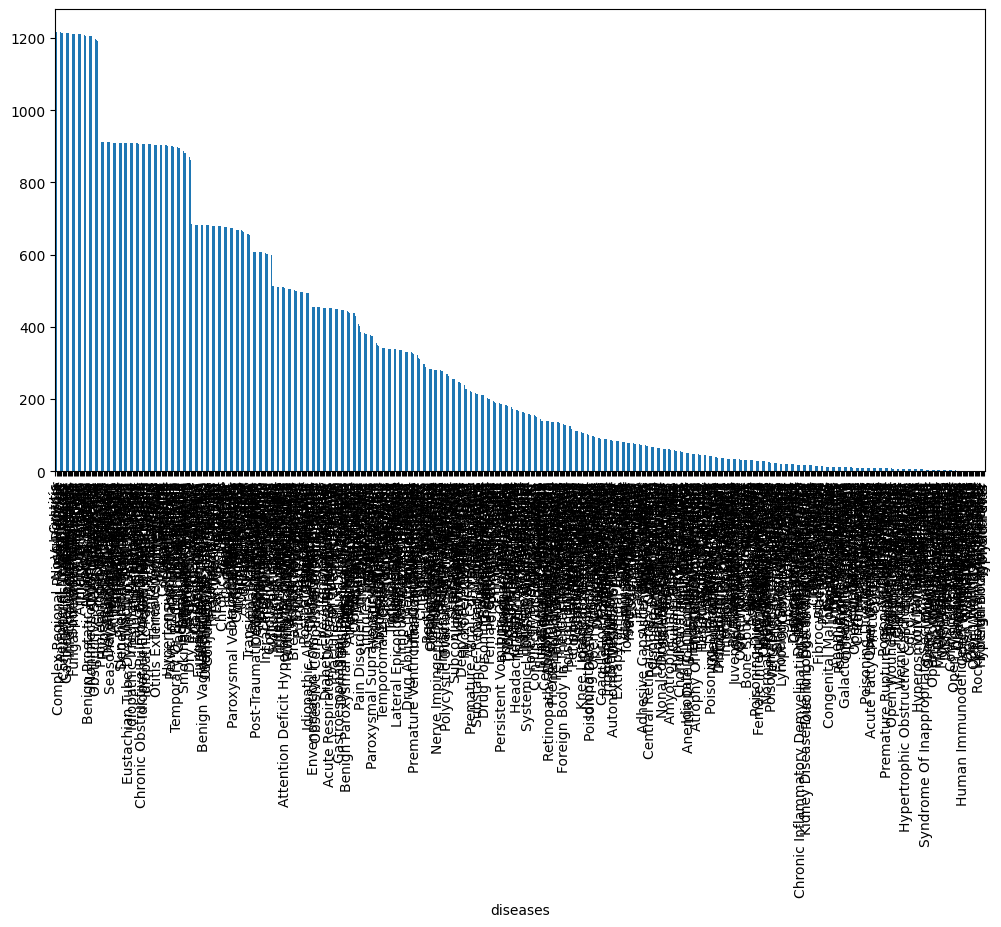

In [4]:
df.diseases.value_counts().plot(kind='bar', figsize=(12, 6))

In [5]:
# Shuffle data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# data yang sudah diacak
df

,diseases,code,Kecemasan dan kegelisahan,Depresi,Sesak napas,Gejala depresi atau psikotis,Nyeri dada tajam,Pusing,Insomnia,Gerakan involunter abnormal,...,Gagap atau terbata-bata,Masalah dengan orgasme,Kelainan bentuk atau struktur hidung,Benjolan di rahang,Luka pada hidung,Kelemahan pinggul,Pembengkakan punggung,Kekakuan atau ketegangan pada pergelangan kaki,Kelemahan pergelangan kaki,Kelemahan leher
0,Graves Disease,E05.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Threatened Pregnancy,O20.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Sepsis,A41,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Cystitis,N30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Eczema,L20.8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246028,Tooth Disorder,K00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246029,Polycystic Ovarian Syndrome (Pcos),E28.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246030,Otitis Externa (Swimmer'S Ear),H60.3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246031,Idiopathic Excessive Menstruation,N92,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
class DiseasePredictionModel:
    def __init__(self, input_dim=378):
        self.input_dim = input_dim
        self.model = None
        self.label_encoder = LabelEncoder()
        
    def prepare_data(self, df):
        # Pisahkan x features dan y target
        X = df.drop(['diseases', 'code'], axis=1)  # Hapus kolom diseases dan code (karena type data object)
        y = df['diseases'] # target
        
        # Encode target labels
        y_encoded = self.label_encoder.fit_transform(y)
        
        # Convert ke categorical (one-hot encoding)
        num_classes = len(self.label_encoder.classes_)
        y_categorical = tf.keras.utils.to_categorical(y_encoded, num_classes)
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y_categorical, 
            test_size=0.2, 
            random_state=42
        )
        
        return X_train, X_test, y_train, y_test, num_classes
    
    def build_model(self, num_classes):
        # input layer
        inputs = Input(shape=(self.input_dim,))
        
        # Hidden layers
        x = layers.Dense(512, activation='relu')(inputs)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.3)(x)
        
        x = layers.Dense(256, activation='relu')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.3)(x)
        
        x = layers.Dense(128, activation='relu')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.2)(x)
        
        # Output layer
        outputs = layers.Dense(num_classes, activation='softmax')(x)
        
        # Buat model
        self.model = models.Model(inputs=inputs, outputs=outputs)
        
        # Compile model
        self.model.compile(
            optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy']    
        )
        
    def train(self, X_train, y_train, X_test, y_test, epochs=25, batch_size=32):
        # Early stopping untuk mencegah overfitting
        early_stopping = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
        
        # Train model
        history = self.model.fit(
            X_train, y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(X_test, y_test),
            callbacks=[early_stopping]
        )
        
        return history


In [7]:
# Inisialisasi model
model = DiseasePredictionModel(input_dim=377)  # 378 - 2 (diseases dan codeicd10)

# Prepare the data
X_train, X_test, y_train, y_test, num_classes = model.prepare_data(df)

In [8]:
# Train model
model.build_model(num_classes)
history = model.train(X_train, y_train, X_test, y_test)

Epoch 1/25
6151/6151 ━━━━━━━━━━━━━━━━━━━━ 62s 9ms/step - accuracy: 0.6090 - loss: 1.9598 - val_accuracy: 0.8400 - val_loss: 0.4714
Epoch 2/25
6151/6151 ━━━━━━━━━━━━━━━━━━━━ 47s 8ms/step - accuracy: 0.8052 - loss: 0.6459 - val_accuracy: 0.8457 - val_loss: 0.4366
Epoch 3/25
6151/6151 ━━━━━━━━━━━━━━━━━━━━ 48s 8ms/step - accuracy: 0.8179 - loss: 0.5891 - val_accuracy: 0.8487 - val_loss: 0.4167
Epoch 4/25
6151/6151 ━━━━━━━━━━━━━━━━━━━━ 47s 8ms/step - accuracy: 0.8260 - loss: 0.5548 - val_accuracy: 0.8470 - val_loss: 0.4133
Epoch 5/25
6151/6151 ━━━━━━━━━━━━━━━━━━━━ 48s 8ms/step - accuracy: 0.8304 - loss: 0.5317 - val_accuracy: 0.8505 - val_loss: 0.3943
Epoch 6/25
6151/6151 ━━━━━━━━━━━━━━━━━━━━ 46s 7ms/step - accuracy: 0.8364 - loss: 0.5073 - val_accuracy: 0.8563 - val_loss: 0.3857
Epoch 7/25
6151/6151 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.8384 - loss: 0.4973 - val_accuracy: 0.8541 - val_loss: 0.3867
Epoch 8/25
6151/6151 ━━━━━━━━━━━━━━━━━━━━ 45s 7ms/step - accuracy: 0.8390 - loss: 0

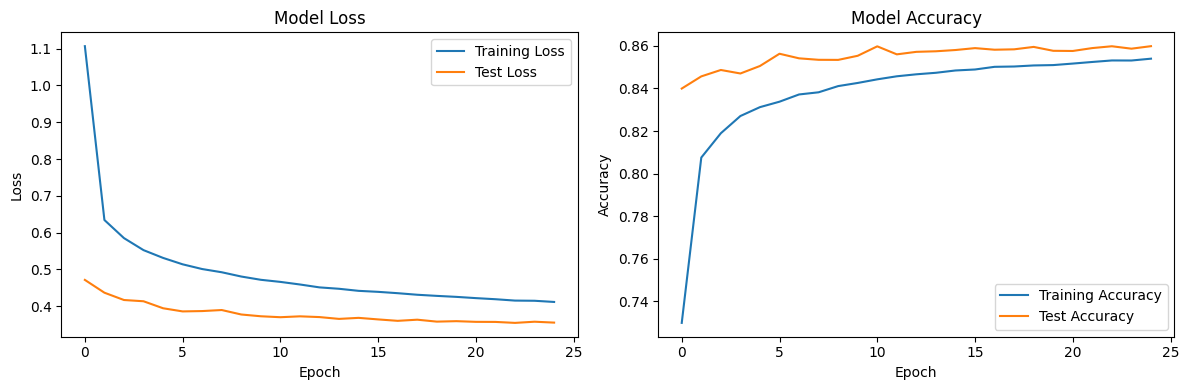

In [9]:
# Visual
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
#save model dan label encoder
import pickle
#model
model_path = "disease_model.h5"
model.model.save(model_path)
#label encoder
encoder_path = "label_encoder.pkl"
with open(encoder_path, 'wb') as f:
    pickle.dump(model.label_encoder, f)